# **AS events vs X chromosomal escape**


It has been reported that differentially expressed sex-biased genes are likely to be 
linked to escape from X chromosome inactivation ([Landscape of X chromosome inactivation across human tissues.
Tukiainen T, et al. Nature 2017;550:244-248](https://pubmed.ncbi.nlm.nih.gov/29022598/)). 

Because of the observed overlap between sex-biased differential expression and AS, we hypothesized that AS events might be more commonly observed in X chromosomal genes that escape inactivation. 

## Retrieve data about X chromosomal escape
This data was extracted from the supplemental material of the Tukiainen paper. Genes are characterized as

1. Escape
2. Inactive
3. Variable
4. Unknown

We examine here the hypothesis that alternatively spliced genes are more likely to escape X inactivation than one would expect
from the X chromosomal average. We compare the proportions of genes labeled ``Escape`` and ``non-Escape`` (everything else) using a Fisher exact test.

In [1]:
suppressMessages({
    options(warn = -1) 
    library(ggplot2)
})

In [2]:
xchromgenetable <- read.table(file="../assets/TukiainenSuppFig2extract.tsv", header=FALSE, sep="\t",
                               skipNul=FALSE, stringsAsFactors = FALSE)
colnames(xchromgenetable)  <- c("ENSG.id","symbol","escape.status","par.status")

# Collect set of X chromosomal genes from the Tukiainen paper

In [3]:
head(xchromgenetable)

,ENSG.id,symbol,escape.status,par.status
,<chr>,<chr>,<chr>,<chr>
1,ENSG00000000003.10,TSPAN6,Variable,nonPAR
2,ENSG00000000005.5,TNMD,Unknown,nonPAR
3,ENSG00000001497.12,LAS1L,Inactive,nonPAR
4,ENSG00000002586.13,CD99,Escape,PAR
5,ENSG00000003096.9,KLHL13,Inactive,nonPAR
6,ENSG00000004848.6,ARX,Unknown,nonPAR


In [4]:
XchromGenes <- sort(xchromgenetable$symbol)
n_xchrom_genes <- length(XchromGenes)
message("Number of X chromosomal genes from Tukiainen paper: ", n_xchrom_genes)

Number of X chromosomal genes from Tukiainen paper: 959



In [5]:
xchrom_escaped <- sort(xchromgenetable[xchromgenetable$escape.status=='Escape',]$symbol)
n_xchrom_escaped <-length(xchrom_escaped)
xchrom_non_escaped <- sort(xchromgenetable[xchromgenetable$escape.status!='Escape',]$symbol)
n_xchrom_non_escaped <- length(xchrom_non_escaped)
if (n_xchrom_genes != (n_xchrom_escaped + n_xchrom_non_escaped)) {
    stop("Problems extracting correct number of X chromosomal genes")
}

message("X chromosomal genes from Tukiainen et al n=", n_xchrom_genes)
message("Escaped X chromomosal genes: ", n_xchrom_escaped, " of a total of ",n_xchrom_genes, " X-chromosomal genes: ", formatC((100*n_xchrom_escaped/n_xchrom_genes), digits=3),"%")
message("Non-Escaped X chromomosal genes: ", n_xchrom_non_escaped, " of a total of ", n_xchrom_non_escaped, " X-chromosomal genes: ", formatC((100*n_xchrom_non_escaped/n_xchrom_genes), digits=3),"%")

X chromosomal genes from Tukiainen et al n=959

Escaped X chromomosal genes: 94 of a total of 959 X-chromosomal genes:  9.8%

Non-Escaped X chromomosal genes: 865 of a total of 865 X-chromosomal genes: 90.2%



# Check overlap of differentially spliced genes with X-chromosomal escaped genes
First we retrieve significantly differentially alternatively spliced (DAS) genes

In [6]:
total_AS_Genes <- read.table(file="../data/Total_AS_by_geneSymbol.tsv", header=TRUE, sep="\t", skipNul=FALSE, stringsAsFactors = FALSE)

In [7]:
head(total_AS_Genes)

,GeneSymbol,n
,<chr>,<int>
1,KDM5C,8
2,SORBS2,5
3,ABCD4,3
4,BNIP2,3
5,FGFR2,3
6,MLH1,3


In [8]:
sigAsGenes <- sort(total_AS_Genes$GeneSymbol)
xchromosomalSigAsGenes <- intersect(sigAsGenes,XchromGenes)
message("Total X chromosomal genes showing alternative splicing: ", length(xchromosomalSigAsGenes))

Total X chromosomal genes showing alternative splicing: 9



In [9]:
# First collect the numbers
das_xchrom_escape <- intersect(xchrom_escaped, xchromosomalSigAsGenes)
das_xchrom_non_escape <- setdiff(xchromosomalSigAsGenes, das_xchrom_escape)
n_das_xchrom_escape <- length(das_xchrom_escape)
n_das_xchrom_non_escape <- length(das_xchrom_non_escape)

# Non-DAS X chromosomal
nondas_xchrom <- setdiff(XchromGenes, xchromosomalSigAsGenes)
nondas_xchrom_escape <- intersect(nondas_xchrom, xchrom_escaped)
nondas_xchrom_non_escape <- intersect(nondas_xchrom, xchrom_non_escaped)
n_nondas_xchrom_escape <- length(nondas_xchrom_escape)
n_nondas_xchrom_non_escape <- length(nondas_xchrom_non_escape)
# sanity check
if (n_xchrom_genes != (n_das_xchrom_escape + n_das_xchrom_non_escape + n_nondas_xchrom_escape + n_nondas_xchrom_non_escape)) {
    message("nondas_xchrom: ", length(nondas_xchrom))
    message("n_das_xchrom_escape: ", n_das_xchrom_escape, " n_das_xchrom_non_escape: ", n_das_xchrom_non_escape)
    message("n_nondas_xchrom_escape: ", n_nondas_xchrom_escape, " n_nondas_xchrom_non_escape: ", n_nondas_xchrom_non_escape)
    message("n_xchrom_genes: ",n_xchrom_genes)
    mysum <- n_das_xchrom_escape + n_das_xchrom_non_escape + n_nondas_xchrom_escape + n_nondas_xchrom_non_escape
    message("but we were expecting ", mysum)
    #stop("Problems extracting correct number of X chromosomal genes")
}

x_vs_as  <- matrix(c(n_das_xchrom_escape, n_nondas_xchrom_escape,n_das_xchrom_non_escape, n_nondas_xchrom_non_escape), nrow=2,byrow = TRUE)
x_vs_as
fisher.test(x_vs_as)

nondas_xchrom: 949

n_das_xchrom_escape: 3 n_das_xchrom_non_escape: 6

n_nondas_xchrom_escape: 91 n_nondas_xchrom_non_escape: 858

n_xchrom_genes: 959

but we were expecting 958



3,91
6,858



	Fisher's Exact Test for Count Data

data:  x_vs_as
p-value = 0.04965
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
  0.7483015 22.4553802
sample estimates:
odds ratio 
  4.701109 


# Get set of genes that show significant differential expression in at least one tissue
Note that one of the column headers is blank and so we just skip one line to avoid a parse error.

In [10]:
dge <- read.table("../data/gene_dge.tsv", sep = "\t", header = FALSE, row.names=1, skip = 1)

In [11]:
head(dge)

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,adipose_subcutaneous,ENSG00000147050.14,ENSG00000147050,KDM6A,247,Adipose (sc),0.6133494,5.0308617,35.85874,3.150846e-157,5.079794e-153,347.77639,chrX
2,adipose_subcutaneous,ENSG00000115041.12,ENSG00000115041,KCNIP3,247,Adipose (sc),-0.9458500,3.4532379,-15.42637,4.374046e-46,6.410760e-43,93.87157,chr2
3,adipose_subcutaneous,ENSG00000224525.2,ENSG00000224525,AL591686.1,247,Adipose (sc),2.2244583,-1.4641204,14.45808,2.280549e-41,2.828232e-38,81.34529,chr1
4,adipose_subcutaneous,ENSG00000141449.14,ENSG00000141449,GREB1L,247,Adipose (sc),-1.4860060,2.7133806,-13.23114,1.272824e-35,1.207086e-32,69.99979,chr18
5,adipose_subcutaneous,ENSG00000258484.3,ENSG00000258484,SPESP1,247,Adipose (sc),-0.8885441,0.9410518,-13.02960,1.047185e-34,8.441355e-32,67.50586,chr15
6,adipose_subcutaneous,ENSG00000134339.8,ENSG00000134339,SAA2,247,Adipose (sc),2.9752333,2.7856727,12.82938,8.397650e-34,6.260957e-31,65.94905,chr11


In [12]:
dge_genes <- sort(dge$V5)
xchromosomalDiffGenes <- intersect(dge_genes, XchromGenes)
xchromosomalDiffGenes <- sort(xchromosomalDiffGenes)
dge_xchrom_escape <- intersect(xchrom_escaped, xchromosomalDiffGenes)
dge_xchrom_nonescape <- setdiff(xchromosomalDiffGenes, xchrom_escaped)
n_dge_xchrom <- length(xchromosomalDiffGenes)
n_dge_xchrom_escape <- length(dge_xchrom_escape)
n_dge_xchrom_nonescape <- length(dge_xchrom_nonescape)

# Non-DGE X chromosomal
nondge_xchrom <- setdiff(XchromGenes, xchromosomalDiffGenes)
n_nondge_xchrom <- length(nondge_xchrom)
nondge_xchrom_escape <- intersect(nondge_xchrom, xchrom_escaped)
nondge_xchrom_non_escape <- intersect(nondge_xchrom, xchrom_non_escaped)
n_nondge_xchrom_escape <- length(nondge_xchrom_escape)
n_nondge_xchrom_non_escape <- length(nondge_xchrom_non_escape)

subtotal <- n_dge_xchrom_escape + n_dge_xchrom_nonescape + n_nondge_xchrom_escape + n_nondge_xchrom_non_escape


message("nondge_xchrom: ", n_nondge_xchrom)
message("n_dge_xchrom_escape: ", n_dge_xchrom_escape, " n_dge_xchrom_non_escape: ", n_dge_xchrom_nonescape)
message("n_nondge_xchrom_escape: ", n_nondge_xchrom_escape, " n_nondge_xchrom_non_escape: ", n_nondge_xchrom_non_escape)
message("n_xchrom_genes: ",n_xchrom_genes)

nondge_xchrom: 848

n_dge_xchrom_escape: 36 n_dge_xchrom_non_escape: 74

n_nondge_xchrom_escape: 58 n_nondge_xchrom_non_escape: 790

n_xchrom_genes: 959



In [13]:
x_vs_dge <- matrix(c(n_dge_xchrom_escape, n_dge_xchrom_nonescape, n_nondge_xchrom_escape, n_nondge_xchrom_non_escape), nrow=2,byrow = TRUE)
x_vs_dge
fisher.test(x_vs_dge)

36,74
58,790



	Fisher's Exact Test for Count Data

data:  x_vs_dge
p-value = 4.224e-13
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
  3.960246 10.948040
sample estimates:
odds ratio 
   6.60328 


# **Make grouped bar plot**
### First collect the counts of escape/inactive/variable X chromosomal, AS, and DGE genes

In [14]:
# Colors for uniformity
# Let's use the following colors for uniformity
darkblue <- "#3c5488"
blue <- "#4BDDB5"
red <- "#e64b35"
nearlyblack <- "#040C04"
purple <- "#790079"
orange = "#ff9900"
green <- "#00A087"

### Transform counts into percentages

In [15]:
# as.total <- as.escape.len + as.non_escape.len
n_das_total <- n_das_xchrom_escape + n_das_xchrom_non_escape


 

as.escape.per <-  n_das_xchrom_escape/n_das_total
as.nonescape.per <-  n_das_xchrom_non_escape/n_das_total
x.total <- n_xchrom_escaped + n_xchrom_non_escaped
x.escape.per <-  n_xchrom_escaped/x.total
x.nonescape.per <- n_xchrom_non_escaped/x.total
dge.total <-n_dge_xchrom_escape +n_dge_xchrom_nonescape
dge.escape.per <-  n_dge_xchrom_escape/dge.total
dge.nonescape.per <-  n_dge_xchrom_nonescape/dge.total
message("AS escape: ", n_das_xchrom_escape, " (", formatC(100*as.escape.per, digits=3), "%) AS non-escape: ", n_das_xchrom_non_escape , " (",100*as.nonescape.per ,"%)")
message("X chr escape: ", n_xchrom_escaped, " (",formatC(100*x.escape.per,digits=3), "%) X chr nonescape: ",n_xchrom_non_escaped, " (", formatC(100*x.nonescape.per,digits=3),"%)")
message("DGE escape: ",  n_dge_xchrom_escape, " (", formatC(100*dge.escape.per,digits=3), "%) DGE inactive: ", dge.nonescape.per," (", formatC(100*dge.nonescape.per,digits=3),"%)")

AS escape: 3 (33.3%) AS non-escape: 6 (66.6666666666667%)

X chr escape: 94 ( 9.8%) X chr nonescape: 865 (90.2%)

DGE escape: 36 (32.7%) DGE inactive: 0.672727272727273 (67.3%)



Saving 6.67 x 6.67 in image

Saved plot as ../pdf/XchromosomalEscape.pdf



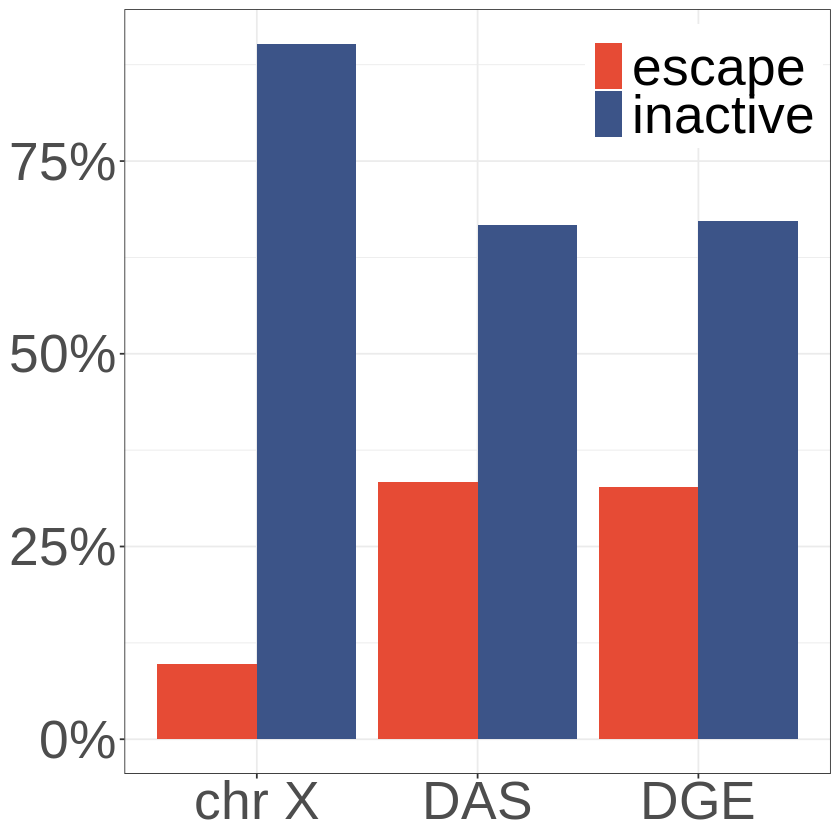

In [16]:
library(ggplot2)
 
# create a dataset
category <- c(rep("DAS" , 2) , rep("chr X" , 2) , rep("DGE" , 2) )
condition <- rep(c("escape" , "inactive") , 3)
value <- c(as.escape.per, as.nonescape.per,x.escape.per, x.nonescape.per,dge.escape.per, dge.nonescape.per)
data <- data.frame(category,condition,value)


# Grouped
g <- ggplot(data, aes(fill=condition, y=value, x=category), color=barcolors) + 
    geom_bar(position="dodge", stat="identity") +
    theme_bw() +
    scale_y_continuous(labels = scales::percent) +
    scale_fill_manual(values=c(red, darkblue)) +
    theme(axis.text = element_text(size=32),
          axis.title = element_blank(),
          legend.title = element_blank(),
          legend.text = element_text(size = 32),
          legend.position = c(0.82,0.9)
          )
ggsave("../pdf/XchromosomalEscape.pdf",g)
message("Saved plot as ../pdf/XchromosomalEscape.pdf")
g